jupyter nbconvert --to slides --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2"

In [1]:
import pods
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#### MLAI Week 4: Basis Functions

### Neil D. Lawrence

### 20th October 2015

### Review
- Last time: explored least squares for univariate and multivariate regression.
- Introduced matrices, linear algebra and derivatives.
- This time: introduce *basis functions* for non-linear regression models.

### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

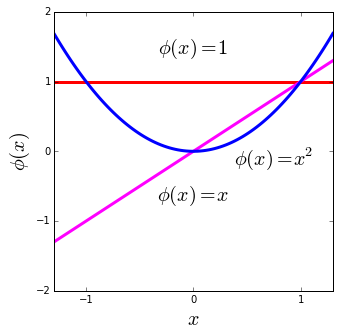

In [2]:
f, ax = plt.subplots(figsize=(5, 5))
x_min = -1.3
x_max = 1.3
x = np.linspace(x_min, x_max, 100)[:, None]
phi = []
phi.append(np.ones((100, 1)))
phi.append(x)
phi.append(x*x)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']
ax.plot(x, phi[0], '-', color=[1, 0, 0], linewidth=3)
ylim = [-2, 2]
ax.set_ylim(ylim)
plt.sca(ax)
plt.yticks([-2, -1, 0, 1, 2])
plt.xticks([-1, 0, 1])
ax.text(loc[0][0], loc[0][1],text[0], horizontalalignment='center', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$\phi(x)$', fontsize=20)

plt.savefig('./diagrams/quadraticBasis1.svg')

ax.plot(x, phi[1], '-', color=[1, 0, 1], linewidth=3)
ax.text(loc[1][0], loc[1][1], text[1], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/quadraticBasis2.svg')

ax.plot(x, phi[2], '-', color=[0, 0, 1], linewidth=3)
ax.text(loc[2][0], loc[2][1], text[2], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/quadraticBasis3.svg')
    


### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/quadraticBasis1.svg", width=40%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/quadraticBasis2.svg", width=40%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
     $$\mathbf{\phi} = [1, x, x^2]$$
   
<center><img src="./diagrams/quadraticBasis3.svg", width=40%></center>

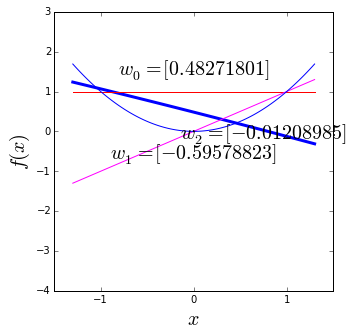

In [3]:
f, ax = plt.subplots(figsize=(5,5))

Phi = np.zeros((phi[0].shape[0], 3))
for i in range(len(phi)):
    Phi[:, i:i+1] = phi[i]

w = np.random.normal(size=(3, 1))
f = np.dot(Phi,w)
a, = ax.plot(x, f, color=[0, 0, 1], linewidth=3)
ax.plot(x, phi[0], color=[1, 0, 0], linewidth=1) 
ax.plot(x, phi[1], color=[1, 0, 1], linewidth=1)
ax.plot(x, phi[2], color=[0, 0, 1], linewidth=1) 
ylim = [-4, 3]
ax.set_ylim(ylim)
plt.sca(ax)
plt.xticks([-1, 0, 1]) 
ax.set_xlabel('$x$', fontsize=20) 
ax.set_ylabel('$f(x)$', fontsize=20)
t = []
for i in range(w.shape[0]):
    t.append(ax.text(loc[i][0], loc[i][1], '$w_' + str(i) + ' = '+ str(w[i]) + '$', horizontalalignment='center', fontsize=20))

plt.savefig('./diagrams/quadraticFunction1.svg')

w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi,w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/quadraticFunction2.svg')


w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi, w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/quadraticFunction3.svg')

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/quadraticFunction1.svg", width=40%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/quadraticFunction2.svg", width=40%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/quadraticFunction3.svg", width=40%></center>

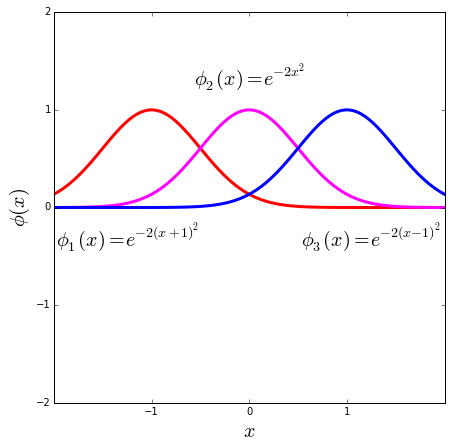

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
x_min = -2
x_max = 2
x = np.linspace(x_min, x_max, 100)[:, None]
phi = []
phi.append(np.exp(-2*(x + 1)**2))
phi.append(np.exp(-2*(x)**2))
phi.append(np.exp(-2*(x - 1)**2))

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-2(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
ax.plot(x, phi[0], '-', color=[1, 0, 0], linewidth=3)
ylim = [-2, 2]
ax.set_ylim(ylim)
plt.sca(ax)
plt.yticks([-2, -1, 0, 1, 2])
plt.xticks([-1, 0, 1])
ax.text(loc[0][0], loc[0][1],text[0], horizontalalignment='center', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$\phi(x)$', fontsize=20)

plt.savefig('./diagrams/radialBasis1.svg')

ax.plot(x, phi[1], '-', color=[1, 0, 1], linewidth=3)
ax.text(loc[1][0], loc[1][1], text[1], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/radialBasis2.svg')

ax.plot(x, phi[2], '-', color=[0, 0, 1], linewidth=3)
ax.text(loc[2][0], loc[2][1], text[2], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/radialBasis3.svg')

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis1.svg", width=40%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis2.svg", width=40%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis3.svg", width=40%></center>

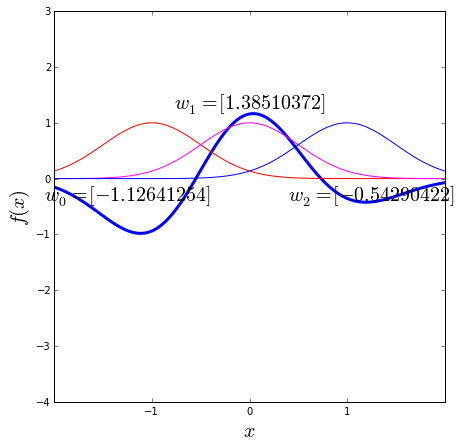

In [ ]:
f, ax = plt.subplots(figsize=(7,7))

Phi = np.zeros((phi[0].shape[0], 3))
for i in range(len(phi)):
    Phi[:, i:i+1] = phi[i]

w = np.random.normal(size=(3, 1))
f = np.dot(Phi,w)
a, = ax.plot(x, f, color=[0, 0, 1], linewidth=3)
ax.plot(x, phi[0], color=[1, 0, 0], linewidth=1) 
ax.plot(x, phi[1], color=[1, 0, 1], linewidth=1)
ax.plot(x, phi[2], color=[0, 0, 1], linewidth=1) 
ylim = [-4, 3]
ax.set_ylim(ylim)
plt.sca(ax)
plt.xticks([-1, 0, 1]) 
ax.set_xlabel('$x$', fontsize=20) 
ax.set_ylabel('$f(x)$', fontsize=20)
t = []
for i in range(w.shape[0]):
    t.append(ax.text(loc[i][0], loc[i][1], '$w_' + str(i) + ' = '+ str(w[i]) + '$', horizontalalignment='center', fontsize=20))

plt.savefig('./diagrams/radialFunction1.svg')

w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi,w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/radialFunction2.svg')


w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi, w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/radialFunction3.svg')

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction1.svg", width=40%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction2.svg", width=40%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction3.svg", width=40%></center>

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}$$


## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{\phi}_i$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Funciton

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\mathbf{\phi}_i\\ &+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\mathbf{w} +\text{const}.\end{align}$$
 

 ### Expand the Brackets
 $$ \begin{align} E(\mathbf{w}, \sigma^2) = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
  \mathbf{w}^\top\sum_{i=1}^{n}\mathbf{\phi}_i y_i\\ & +\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum
    _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w} +\text{const}.\end{align}$$

### Multivariate Derivatives Reminder

-   We will need some multivariate calculus.
    $$\frac{\text{d}\mathbf{a}^{\top}\mathbf{w}}{\text{d}\mathbf{w}}=\mathbf{a}$$
    and
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{w}$$
    or if $\mathbf{A}$ is symmetric (*i.e.*
    $\mathbf{A}=\mathbf{A}^{\top}$)
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=2\mathbf{A}\mathbf{w}.$$

### Differentiate

Differentiating with respect to the vector $\mathbf{w}$ we obtain
$$\frac{\text{d} L\left(\mathbf{w},\beta \right)}{\text{d} \mathbf{w}}=\frac{1}{\sigma^2} \sum _{i=1}^{n}\mathbf{\phi}_iy_i-\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w}$$
Leading to
$$\mathbf{w}^{*}=\left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\mathbf{\phi}_iy_i,$$

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^\top = \mathbf{\Phi}^\top \mathbf{\Phi}$$
$$\sum _{i=1}^{n}\mathbf{\phi}_iy_i = \mathbf{\Phi}^\top \mathbf{y}$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^\top \mathbf{y}$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\mathbf{\phi}_i\right)^{2}}{n}.$$

### Avoid Direct Inverse

- E.g. Solve for $\mathbf{w}$
  $$\left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)\mathbf{w} = \mathbf{\Phi}^\top \mathbf{y}$$
  
- See `np.linalg.solve`

- In practice use $\mathbf{Q}\mathbf{R}$ decomposition (see lab class notes).

### Polynomial Fits to Olympic Data

In [ ]:
data = pods.datasets.olympic_100m_men()
f, ax = plt.subplots(1, 2, figsize=(14,7))
#ax.plot(data['X'], data['Y'], 'rx', markersize=10)
x = data['X']
y = data['Y']
x_pred = np.linspace(1892, 2020, 130)[:, None]

# Rescale x data
x_span = x.max() - x.min()

max_order = 6
num_data = x.shape[0]
err = np.array([np.nan]*(max_order+1))

for order in range(0,max_order+1):
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((x_pred.shape[0], order+1))
    for i in range(0,order+1):
        Phi[:, i:i+1] = (2*(x-x.min())/x_span - 1)**i
        Phi_pred[:, i:i+1] = (2*(x_pred-x.min())/x_span - 1)**i

    # numerically this is not a good idea, but this is what the maths looks like
    w_star = np.linalg.solve(np.dot(Phi.T,Phi),np.dot(Phi.T,y))
    y_pred = np.dot(Phi_pred,w_star)
    sum_squares = ((y - np.dot(Phi,w_star))**2).sum()
    sigma2 = sum_squares/num_data;
    
    err[order] = num_data/2.*np.log(sigma2) + sum_squares/(2.*sigma2)

    ax[0].cla()
    ax[0].plot(x, y, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ylim = ax[0].get_ylim()
    ax[0].plot(x_pred, y_pred, color=[0, 0, 1], linewidth=2)
    ax[0].set_xlabel('year', fontsize=20)
    ax[0].set_ylim(ylim)
    plt.sca(ax[0])
    plt.xticks([1892, 1932, 1972, 2012])

    xlim = ax[0].get_xlim()
    
   
    ax[1].plot(range(0,max_order+1), err, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ax[1].set_ylim([-40, 0])
    ax[1].set_xlim([-1, max_order+1])
    ax[1].set_xlabel('polynomial order', fontsize=20)

    file_name = 'olympicPoly' + str(order) + '.svg'
    plt.savefig('./diagrams/'+file_name)


Acquiring resource: rogers_girolami_data

Details of data: 
Data from the textbook 'A First Course in Machine Learning'. Available from http://www.dcs.gla.ac.uk/~srogers/firstcourseml/.

Please cite:
A First Course in Machine Learning. Simon Rogers and Mark Girolami: Chapman & Hall/CRC, ISBN-13: 978-1439824146

After downloading the data will take up 21949154 bytes of space.

Data will be stored in /home/nathan/ods_data_cache/rogers_girolami_data.

Do you wish to proceed with the download? [yes/no]


![](./diagrams/olympicPoly0.svg) 

![](./diagrams/olympicPoly1.svg) 

![](./diagrams/olympicPoly2.svg) 

![](./diagrams/olympicPoly3.svg) 

![](./diagrams/olympicPoly4.svg) 

![](./diagrams/olympicPoly5.svg) 

![](./diagrams/olympicPoly6.svg) 

#### Reading

- Section 1.4 of @Rogers:book11.
- Chapter 1, pg 1-6 of @Bishop:book06.
- Chapter 3, Section 3.1 of @Bishop:book06 up to pg 143.

 